# GOLD PRICE PREDICTION

### 1- Data Collection
### 2- Data Analysis(EDA)
### 3- Feature Engineering
### 4- Model Selection ve Building

## Data  Description

This is the gold price dataset. The data set provides information about gold prices based on other stock prices as mentioned below; Here we will try to build the best machine learning model to analyze gold price and predict gold price.

Dataset colums:
- Date 'mm/dd/yy'
- SPX -is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United States.
- GLD - Gold Price
- USO - United States Oil Fund
- SLV -Silver Price
- EUR/USD - cuurency pair quotation of the Euro against the US

In [44]:
# python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# close warning library
import warnings
warnings.filterwarnings("ignore")


In [45]:
# create data dream to read dataset
data = pd.read_csv('C:/Users/HAZAL/OneDrive/Masaüstü/Projeler/gold_price_prediction/gld_price_data.csv')

In [46]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [47]:
# check the data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [48]:
# find number of rows and column
data.shape

(2290, 6)

In [49]:
# describe data numerical columns
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [50]:
# Selects only the columns in data with string data type and prints the unique values of each column.

for col in data.select_dtypes(include='object').columns:
    print(col) # prints the column name that has the object type
    print(data[col].unique()) # prints the unique values of the column that has the object type

Date
['1/2/2008' '1/3/2008' '1/4/2008' ... '5/10/2018' '5/14/2018' '5/16/2018']


## Explorarity Data Analysis(EDA)

- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Features
- Find Categorical Feature Distrubition
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Label
- Find Continuous Numerical Features
- Distrubition of Continous Numerical Features
- Relation between Continous numerical Features and Label
- Find Outliers in numerical features
- Explore the Correlation between numerical features

### 1- Find Unwanted Columns
- There is no unwanted column present in given dataset to remove.

### 2- Find Missing Values
- No missing value found

In [51]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [52]:
data = data.dropna()

### 3- Find Features with One Value
- No feature with only one value.

In [53]:
# Prints the name of each column in data and the number of unique values of that column.
for column in data.columns:
    print(column, data[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


### 4- Explore the Categorical Features
- There are 1 categorical features

In [54]:
# When returning columns, this code checks the data type of each column.
# If the column's data type is 'object' and the column name is not 'GLD', it adds that column to the categorical_features list. 
# This way you only select columns with data type 'object' other than the 'GLD' column.
categorical_features = [feature for feature in data.columns if (data[feature].dtype == 'object') and (feature != 'GLD')]
categorical_features

['Date']

In [55]:
# Accurately calculates the count for each categorical attribute (Date) 
for feature in categorical_features:
    num_categories = len(data[feature].unique())
    print('The feature is {} and number of categories are {}'.format(feature, num_categories))


The feature is Date and number of categories are 2290


### 5- Find Categorical Feature Distrubition
- NA

### 6- Relationship between Categorical Features and Label
- NA

### 7- Explore the Numerical Features
- There are 4 numerical features

In [56]:
# Selects numeric properties other than the datatype object and the column named GLD and prints the number.
numerical_features = [feature for feature in data.columns if (data[feature].dtype != 'object' and feature != 'GLD')]
num_numerical_features = len(numerical_features)

print('Number of numerical variables:', num_numerical_features)
print(data[numerical_features].head())


Number of numerical variables: 4
       SPX         USO       SLV    EUR/USD
0  1447.160034  78.470001  15.180  1.471692
1  1447.160034  78.370003  15.285  1.474491
2  1411.630005  77.309998  15.167  1.475492
3  1416.180054  75.500000  15.053  1.468299
4  1390.189941  76.059998  15.590  1.557099


### 8- Find Discrete Numerical Features
- There is no Discrete Variables in give dataset

In [57]:
#  selects those with unique values less than 25 within numeric attributes
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25]
num_discrete_features = len(discrete_features)

print(f"Discrete Variables Count: {num_discrete_features}")


Discrete Variables Count: 0


### 9- Relation between Discrete numerical Features and Label
- NA

### 10- Find Continous Numerical Features 
- There are 4 continous numerical features

In [58]:
# Creates a new list, continuous_features, containing the features in the numerical_features list that are not in the 
# discrete_features list and named 'GLD'.
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + ['GLD']]
num_continuous_features = len(continuous_features)

print(f"Continuous Feature Count: {num_continuous_features}")


Continuous Feature Count: 4


### 11- Distribution of Continous Numerical Features
- It seems SPX, SLV and EUR/USD distributed normally.
- USO heavely skewed towards right and seems to be have some outliers.

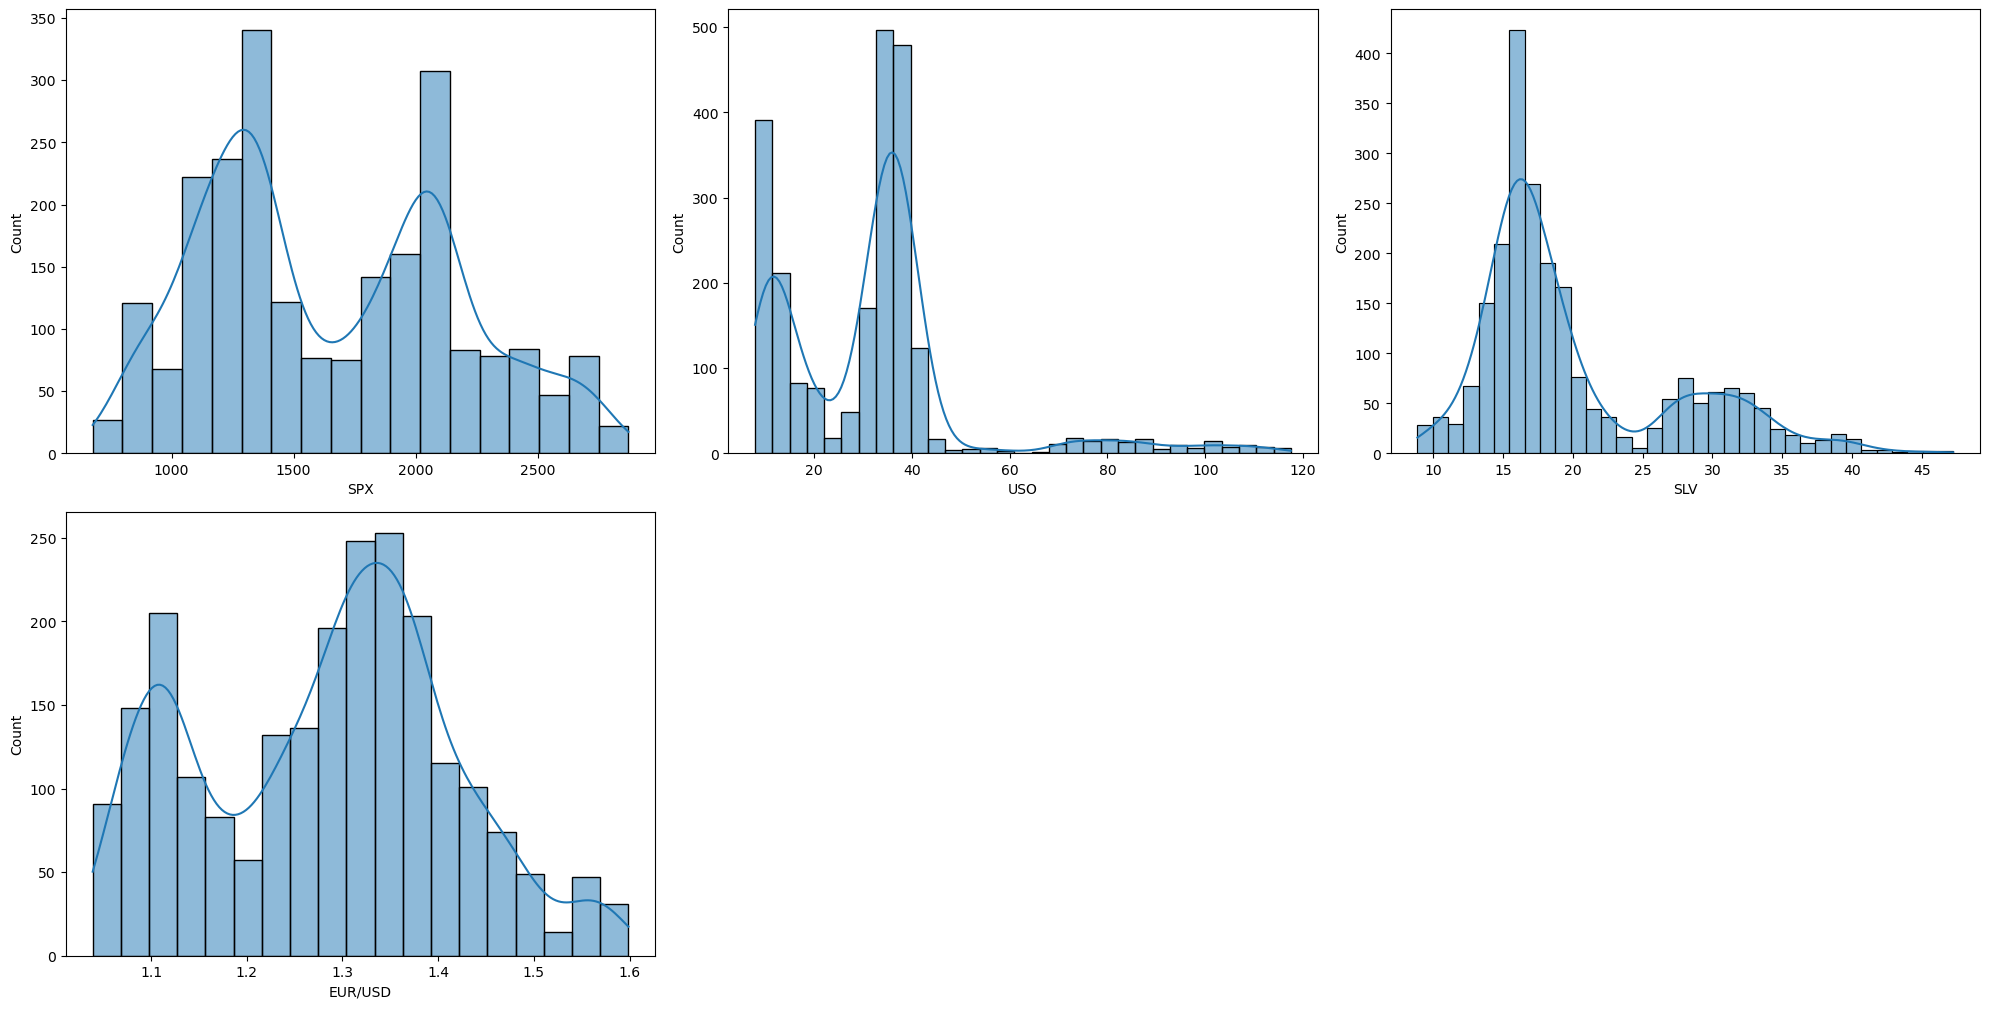

In [59]:
#  we plot histograms (frequency distribution plot) of the data

# We set the graphic to 20 by 60 with figsize and set the background color of the graphic to white with the facecolor argument.
plt.figure(figsize=(20, 60), facecolor='white')

for i, continuous_feature in enumerate(continuous_features, 1):
    # We create a subchart layout with 12 rows and 3 columns.
    plt.subplot(12, 3, i)
    # Here we create the histogram of the data. We ensure that the feature called continuous_feature is retrieved from the data 
    # frame. The kde=True argument causes a kernel density estimate to be plotted over the histogram.
    # This shows a smoother estimation of the data distribution.
    sns.histplot(data[continuous_feature], kde=True)
    # The feature name continuous_feature is used as the x-axis label.
    plt.xlabel(continuous_feature)

# It allows subgraphs to be placed in a tight order so that they are closer together and more readable.
plt.tight_layout()
plt.show()


### 12- Relation between Continuous numerical Features and Labels
- It seems USO and SLV has some outliers.

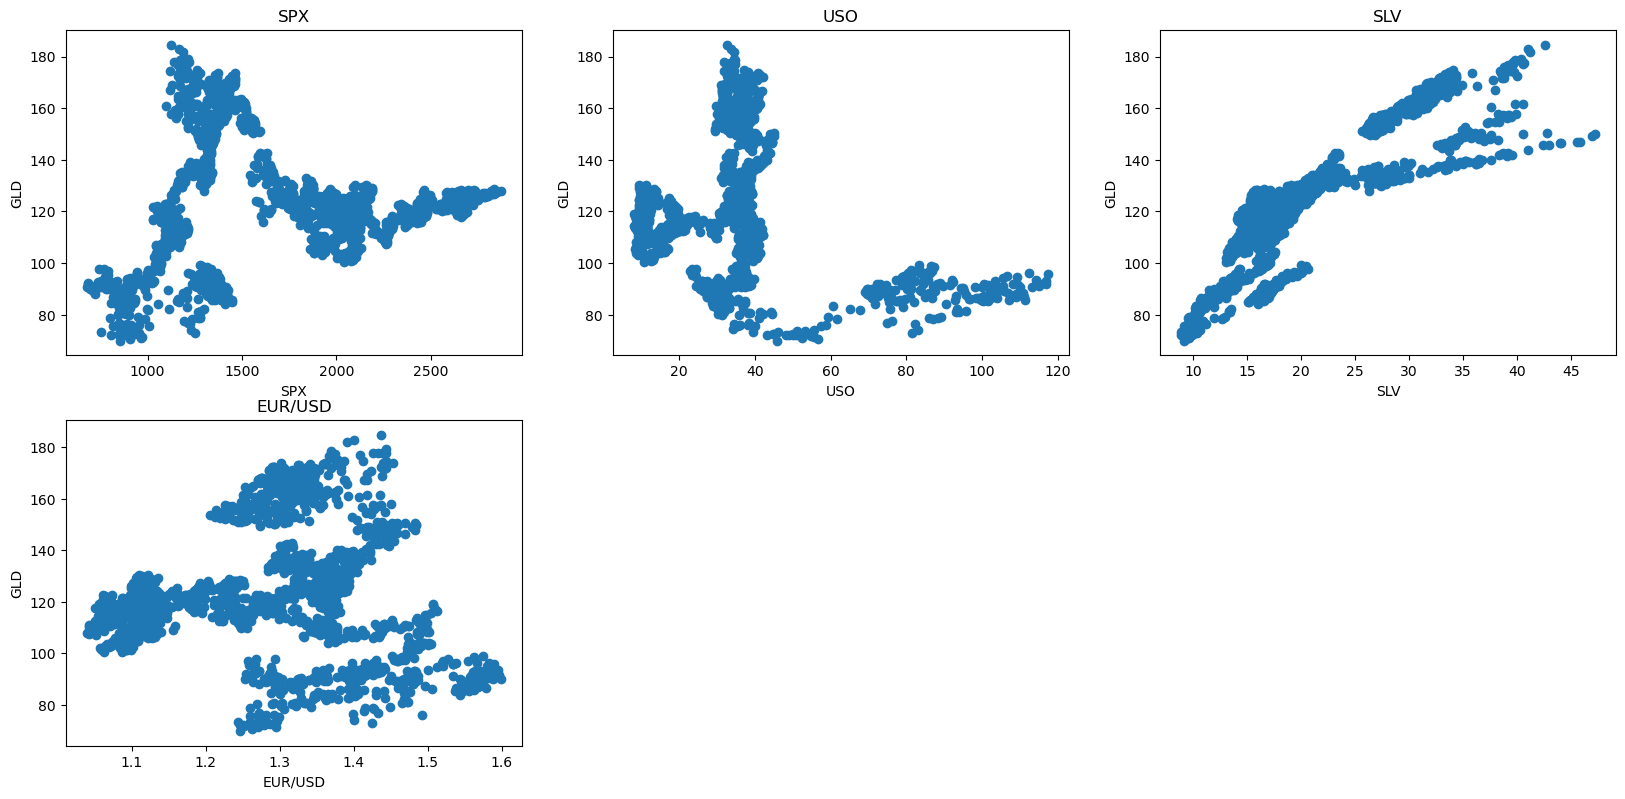

In [60]:
# To visualize the relationship between continuous features in the data frame and the "GLD" feature, we create a series of 
# scatter plots and display these plots in one large frame.

plt.figure(figsize=(20,60), facecolor = 'white')
# Represents the sequence number of subgraphs.
plotnumber = 1

for feature in continuous_features:
    data = data.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature], data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plotnumber += 1
plt.show()

### 13- Find Outliers in Numerical Features
- It seems USO and SLV has some outliers.

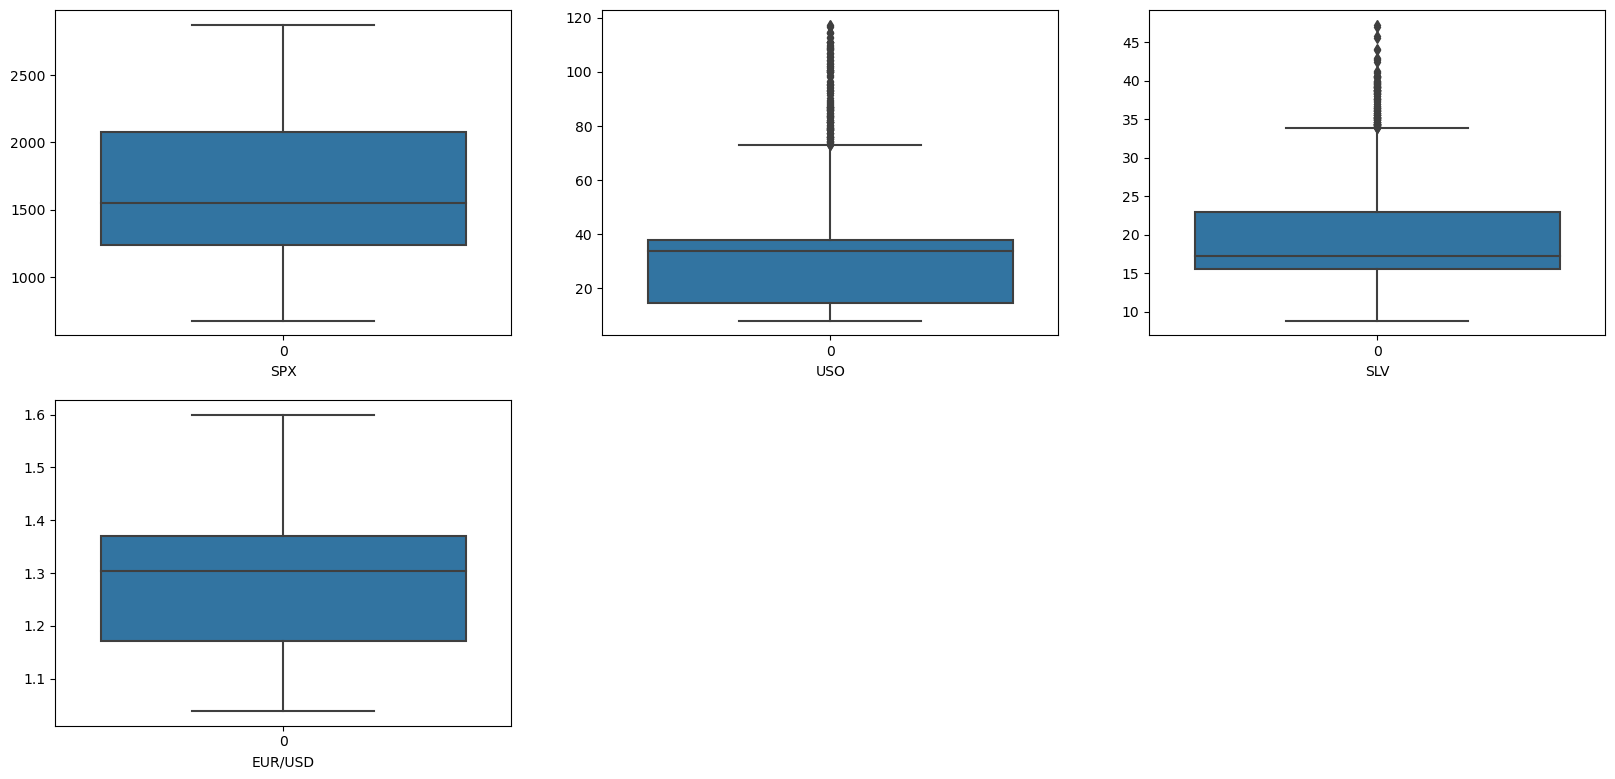

In [61]:
# boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor = 'white')
plotnumber = 1

for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

### 14- Explore the Correlation between numerical features
- It seems SLV features is heavily correlated with GLD

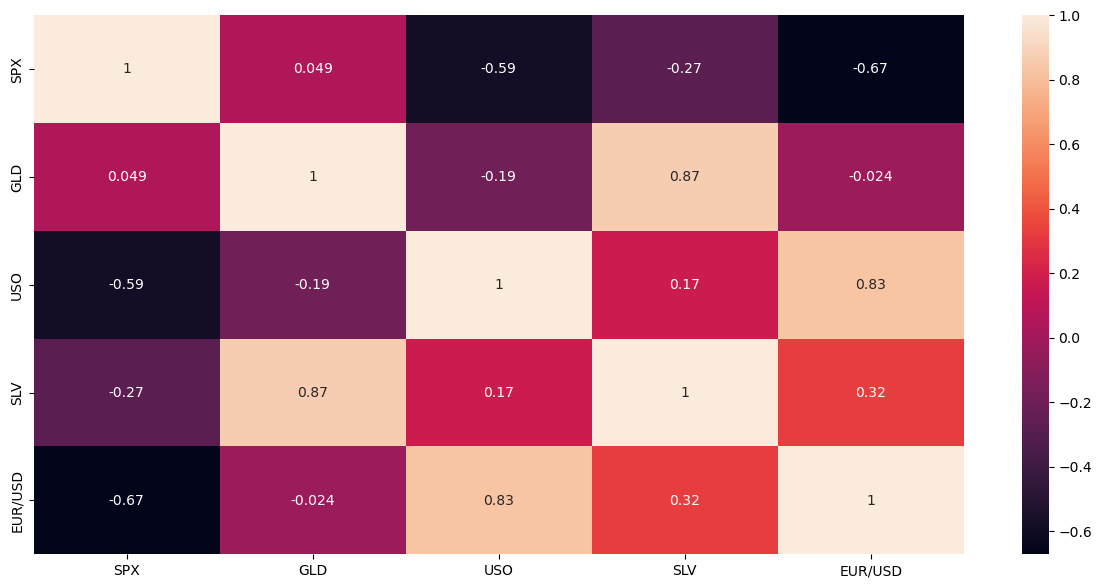

In [62]:
# Checking for correlation
cor_mat = data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat, annot=True)
plt.show()

In [63]:
print(cor_mat['GLD'].sort_values(ascending=False), '/n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 /n


## Feature Engineering
- Drop Unwanted Features
- Handle Missing Values
- Handle Categorical Features 
- Handle Feature Scalling
- Remove Outliers

As per Explorarity Data Analysis EDA,
- This is no unwanted column present in given dataset remove
- no missing value found
- outliers found in USO

In [64]:
data_new=data.copy()

In [65]:
data_new.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [66]:
# drop Date
data_new.drop(['Date'], axis=1, inplace=True)

### Split Dataset into Training set and Test set

In [67]:
x = data_new.drop(['GLD'], axis=1)
y = data_new['GLD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [68]:
len(x_train)

1832

In [69]:
len(x_test)

458

## Model Selection

In [71]:
# Decision Tree Regressor
tree_regression = DecisionTreeRegressor(random_state=42, max_depth=2) 
tree_regression.fit(x_train, y_train) 
predict_tree_regression = tree_regression.predict(x_test) 

# Random Foret Regressor
random_regression = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42) #ağaç sayısı=100
random_regression.fit(x_train, y_train)
predict_random_regression = random_regression.predict(x_test)


# Decision Tree Regressor
xgboost_regression = XGBRegressor(n_estimators=100, max_depth=2)
xgboost_regression.fit(x_train, y_train)
predict_xgboost_regression = xgboost_regression.predict(x_test)


predicts = [predict_tree_regression, predict_random_regression, predict_xgboost_regression ]
algorithm_names = ["Decision Tree Alg.", "Random Forest Alg.", "XGBoost Alg."]

def performance_calculate(predict): 
    mae = mean_absolute_error(y_test, predict)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predict)
    
    data = [mae, mse, rmse, r2]
    return data  


series  = []
metrics = ["Mean Absolute Error(MAE)", "Mean Squared Error(MSE)", "Root Mean Squared Error(RMSE)", "R2"]

for i in predicts:
    data = performance_calculate(i)
    series.append(data)
    
df = pd.DataFrame(data=series, index=algorithm_names, columns=metrics)
pd.set_option('display.colheader_justify', 'center')
print(df.to_string())


                    Mean Absolute Error(MAE)  Mean Squared Error(MSE)  Root Mean Squared Error(RMSE)     R2   
Decision Tree Alg.          8.852677                119.529926                   10.932974            0.767655
Random Forest Alg.          3.814974                 27.283538                    5.223365            0.946966
XGBoost Alg.                2.691770                 15.968598                    3.996073            0.968960
